## Librerias a utilizar 

In [47]:
Pkg.add("HDMjl")
Pkg.add("StatsModels")
using Pkg
using CSV
using Distributions
using DataFrames
using Dates
using Plots
using Random
using LinearAlgebra
using LaTeXStrings
using Lasso
using GLMNet
using HDMjl
using StatsModels

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [3eaba693] + StatsModels v0.7.4
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Pregunta 1

In [48]:
data= CSV.read(
        download("https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/data/wage2015_subsample_inference.csv"),
        DataFrame,
        types = Dict(:occ2 => String, :ind2 => String)
);

In [49]:
data = select(data, Not(["wage", "rownames"]));

In [50]:
control_formula =@formula(lwage ~ 1 + (exp1 + exp2 + exp3 + exp4) * (hsg + scl + ad + so + we +sex + ne + occ2 + ind2) + (hsg + scl + sex + ad) * (so + we + ne + occ2 + ind2) + (so + we + ne) * (occ2 + ind2) + occ2 * ind2);

control_frame = ModelFrame(control_formula, data);

control_frame

ModelFrame{@NamedTuple{lwage::Vector{Float64}, exp1::Vector{Float64}, exp2::Vector{Float64}, exp3::Vector{Float64}, exp4::Vector{Float64}, hsg::Vector{Float64}, scl::Vector{Float64}, ad::Vector{Float64}, so::Vector{Float64}, we::Vector{Float64}, sex::Vector{Float64}, ne::Vector{Float64}, occ2::PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}, ind2::PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}}, StatisticalModel}(lwage ~ 1 + exp1 + exp2 + exp3 + exp4 + hsg + scl + ad + so + we + sex + ne + occ2 + ind2 + exp1 & hsg + exp1 & scl + exp1 & ad + exp1 & so + exp1 & we + exp1 & sex + exp1 & ne + exp1 & occ2 + exp1 & ind2 + exp2 & hsg + exp2 & scl + exp2 & ad + exp2 & so + exp2 & we + exp2 & sex + exp2 & ne + exp2 & occ2 + exp2 & ind2 + exp3 & hsg + exp3 & scl + exp3 & ad + exp3 & so + exp3 & we + exp3 & sex + exp3 & ne + exp3 & occ2 + exp3 & ind2 + exp4 & hsg + exp4 & scl + exp4 & ad + exp4 & so + exp4 & we + exp4 & sex + exp4 & ne + exp4 & occ2 + exp4 & ind2 + hsg & so +

In [51]:
control_names = coefnames(control_frame);

In [52]:
control_matrix=modelmatrix(control_frame);

In [53]:
control_matrix_df = DataFrame(control_matrix, :auto);

In [54]:
control_matrix_df

5150×964 DataFrame
  Row │ x1       x2       x3       x4       x5        x6       x7       x8     ⋯
      │ Float64  Float64  Float64  Float64  Float64   Float64  Float64  Float6 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     1.0      7.0     0.49    0.343    0.2401      0.0      0.0      0. ⋯
    2 │     1.0     31.0     9.61   29.791   92.3521      0.0      0.0      0.
    3 │     1.0     18.0     3.24    5.832   10.4976      1.0      0.0      0.
    4 │     1.0     25.0     6.25   15.625   39.0625      0.0      0.0      1.
    5 │     1.0     22.0     4.84   10.648   23.4256      0.0      0.0      0. ⋯
    6 │     1.0      1.0     0.01    0.001    0.0001      0.0      0.0      0.
    7 │     1.0     42.0    17.64   74.088  311.17        1.0      0.0      0.
    8 │     1.0     37.0    13.69   50.653  187.416       1.0      0.0      0.
  ⋮   │    ⋮        ⋮        ⋮        ⋮        ⋮         ⋮        ⋮        ⋮   ⋱
 5144 │     1.0     17.0     2.89    4.913    8.3521      0.0      0.0      0. ⋯
 5145 │     1.0     10.0     1.0     1.0      1.0         0.0      0.0      0.
 5146 │     1.0      9.0     0.81    0.729    0.6561      0.0      0.0      0.
 5147 │     1.0     12.0     1.44    1.728    2.0736      0.0      1.0      0.
 5148 │     1.0     11.0     1.21    1.331    1.4641      0.0      0.0      1. ⋯
 5149 │     1.0     10.0     1.0     1.0      1.0         1.0      0.0      0.
 5150 │     1.0     14.0     1.96    2.744    3.8416      0.0      0.0      1.
                                               957 columns and 5135 rows omitted

Variables de control 

In [55]:
rename!(control_matrix_df, Dict(zip(names(control_matrix_df), control_names)))

5150×964 DataFrame
  Row │ (Intercept)  exp1     exp2     exp3     exp4      hsg      scl      ad ⋯
      │ Float64      Float64  Float64  Float64  Float64   Float64  Float64  Fl ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │         1.0      7.0     0.49    0.343    0.2401      0.0      0.0     ⋯
    2 │         1.0     31.0     9.61   29.791   92.3521      0.0      0.0
    3 │         1.0     18.0     3.24    5.832   10.4976      1.0      0.0
    4 │         1.0     25.0     6.25   15.625   39.0625      0.0      0.0
    5 │         1.0     22.0     4.84   10.648   23.4256      0.0      0.0     ⋯
    6 │         1.0      1.0     0.01    0.001    0.0001      0.0      0.0
    7 │         1.0     42.0    17.64   74.088  311.17        1.0      0.0
    8 │         1.0     37.0    13.69   50.653  187.416       1.0      0.0
  ⋮   │      ⋮          ⋮        ⋮        ⋮        ⋮         ⋮        ⋮        ⋱
 5144 │         1.0     17.0     2.89    4.913    8.3521      0.0      0.0     ⋯
 5145 │         1.0     10.0     1.0     1.0      1.0         0.0      0.0
 5146 │         1.0      9.0     0.81    0.729    0.6561      0.0      0.0
 5147 │         1.0     12.0     1.44    1.728    2.0736      0.0      1.0
 5148 │         1.0     11.0     1.21    1.331    1.4641      0.0      0.0     ⋯
 5149 │         1.0     10.0     1.0     1.0      1.0         1.0      0.0
 5150 │         1.0     14.0     1.96    2.744    3.8416      0.0      0.0
                                               957 columns and 5135 rows omitted

Tratamiento y su interacción con otras variables

In [56]:
model_treatment_design =@formula (lwage ~ -1 + clg +clg *(shs + hsg + scl + sex + mw + so + we + exp1 + exp2 + exp3 + exp4));

In [57]:
treatment_frame = ModelFrame(model_treatment_design, data);

In [58]:
treatment_names = coefnames(treatment_frame)

23-element Vector{Any}:
 "clg"
 "shs"
 "hsg"
 "scl"
 "sex"
 "mw"
 "so"
 "we"
 "exp1"
 "exp2"
 ⋮
 "clg & scl"
 "clg & sex"
 "clg & mw"
 "clg & so"
 "clg & we"
 "clg & exp1"
 "clg & exp2"
 "clg & exp3"
 "clg & exp4"

In [59]:
treatment_matrix = modelmatrix(treatment_frame);

In [60]:
treatment_df = DataFrame(treatment_matrix, :auto );

In [61]:
rename!(treatment_df, Dict(zip(names(treatment_df), Symbol.(treatment_names))))

5150×23 DataFrame
  Row │ clg      shs      hsg      scl      sex      mw       so       we      ⋯
      │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0 ⋯
    2 │     1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
    3 │     0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0
    4 │     0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0
    5 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0 ⋯
    6 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0
    7 │     0.0      0.0      1.0      0.0      1.0      0.0      0.0      0.0
    8 │     0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0
  ⋮   │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮    ⋱
 5144 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      1.0 ⋯
 5145 │     1.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0
 5146 │     1.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0
 5147 │     0.0      0.0      0.0      1.0      1.0      0.0      0.0      1.0
 5148 │     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0 ⋯
 5149 │     0.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0
 5150 │     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0
                                                15 columns and 5135 rows omitted

In [62]:
interaction_cols = treatment_df[:,[occursin("clg",name) for name in names(treatment_df)]];

Combinando las matrices

In [63]:
X =hcat(treatment_df, control_matrix_df, makeunique=true)

5150×987 DataFrame
  Row │ clg      shs      hsg      scl      sex      mw       so       we      ⋯
      │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0 ⋯
    2 │     1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0
    3 │     0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0
    4 │     0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0
    5 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0 ⋯
    6 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0
    7 │     0.0      0.0      1.0      0.0      1.0      0.0      0.0      0.0
    8 │     0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0
  ⋮   │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮    ⋱
 5144 │     1.0      0.0      0.0      0.0      1.0      0.0      0.0      1.0 ⋯
 5145 │     1.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0
 5146 │     1.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0
 5147 │     0.0      0.0      0.0      1.0      1.0      0.0      0.0      1.0
 5148 │     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0 ⋯
 5149 │     0.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0
 5150 │     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0
                                               979 columns and 5135 rows omitted

In [64]:
X=select(X, Not(["(Intercept)"]));

In [65]:
Y = [data[:,1];;];

## Pregunta 2

In [66]:
function log_grid(lower::Int, upper::Int, log_step::Float64)
    log_grid = range(lower, stop=upper, length= Int(1 /log_step))
    return exp.(log_grid)
end

log_grid (generic function with 1 method)

Estableciendo los kflods manualmente 

In [68]:
function k_folds(data::AbstractArray, k:: Int = 5)
    mdl = size(data, 1) % k 
    floor = size(data, 1) ÷ k 

    if mdl == 
        trues == fill(1, floor, 1)
        split_matrix = kron(I(k), trues)
    else 
        trues_g1 = fill(1, floor + 1, 1)
        split_matrix_g1 = kron(I(mdl), trues_g1)
        
        trues_g2 = fill(1, floor, 1)
        split_matrix_g2 = kron(I(k - mdl), trues_g2)
        
        split_matrix = [split_matrix_g1  zeros(size(split_matrix_g1, 1), size(split_matrix_g2, 2));
                        zeros(size(split_matrix_g2, 1), size(split_matrix_g1, 2))  split_matrix_g2]
    end
    
        sm_bool = split_matrix .== 1
        splits = [sm_bool[:, x] for x in 1:k]
                    
        return splits
end

k_folds (generic function with 2 methods)

Definiendo la función que encontrará el lambda óptimo

In [69]:
function optimal_lambda(Y::AbstractVector, X::AbstractArray, lambda_bounds::Tuple{Int, Int}, k::Int = 5; niter::Int = 100)
    Y = vec(Y) 

    if ndims(X) == 1
        X = reshape(X, :, 1)
    end

    folds = k_folds(X, k)
    all_lambdas = log_grid(lambda_bounds[1],lambda_bounds[2], 1/niter)
    all_mse = zeros(niter)

    for (j, l) in enumerate(all_lambdas)
        split_pes = zeros(k)
        
        for i in 1:k
            X_train = X[.!folds[i], :]
            X_test = X[folds[i], :]
            y_train = Y[.!folds[i]]
            y_test = Y[folds[i]]

            model = glmnet(X_train, y_train, alpha=1.0, lambda=[l])
            predict = GLMNet.predict(model, X_test)

            pe = sum((y_test - predict).^2)
            split_pes[i] = pe
        end

        all_mse[j] = mean(split_pes)
    end

    selected = argmin(all_mse)
    optimal_lambda = all_lambdas[selected]
    optimal_model = glmnet(X, Y, alpha=1.0, lambda=[optimal_lambda])
    optimal_coef = [optimal_model.a0;optimal_model.betas[:]]

    output = Dict(
        "optimal_lambda" => optimal_lambda,
        "optimal_coef" => optimal_coef,
        "all_lambdas" => all_lambdas,
        "all_mse" => all_mse
    )

    return output
end

optimal_lambda (generic function with 2 methods)

In [23]:
function predict_model(optimal_model::Dict, X::AbstractArray)
    intercept = ones(size(X, 1), 1)
    Z = [intercept;; X]
    
    return Z * optimal_model["optimal_coef"]
end

predict_model (generic function with 1 method)

Encontrando el lambda óptimo

In [70]:
X_matrix = Matrix(treatment_df)

5150×23 Matrix{Float64}:
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0   7.0  0.49   0.343   0.2401
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  31.0  9.61  29.791  92.3521
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  22.0  4.84  10.648  23.4256
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0   1.0  0.01   0.001   0.0001
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0   4.0  0.16   0.064   0.0256
 ⋮                        ⋮              ⋱             ⋮             
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0   0.0  0.0    0.0     0.0
 1

In [71]:
Y_vector = vec(Y)

5150-element Vector{Float64}:
 2.2633643798407643
 3.872802292274865
 2.403126322215923
 2.634927936273247
 3.361976668508874
 2.4622152385859297
 2.9565115604007097
 2.9565115604007097
 2.4849066497880004
 2.9565115604007097
 ⋮
 3.117779707996832
 2.822980167776187
 3.1796551117149194
 2.6280074934286737
 2.6925460145662448
 3.138833117194664
 3.649658740960655
 3.4955080611333966
 2.8511510447428834

In [72]:
model_lasso = optimal_lambda(Y_vector, X_matrix, (-7,7))

Dict{String, Any} with 4 entries:
  "optimal_coef"   => [3.19658, -0.109978, -0.718407, -0.621321, -0.468106, -0.…
  "all_mse"        => [285.276, 285.201, 285.145, 285.088, 285.025, 284.963, 28…
  "optimal_lambda" => 0.00497649
  "all_lambdas"    => [0.000911882, 0.0010504, 0.00120996, 0.00139375, 0.001605…

In [73]:
model_lasso["optimal_lambda"]

0.004976490759881519

Estableciendo el método de doble lasso

In [74]:
D = X[!, "clg"]

5150-element Vector{Float64}:
 1.0
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 ⋮
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0

In [75]:
W = select(X, Not(["clg"]))
W_matrix = Matrix(W)

5150×985 Matrix{Float64}:
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮         ⋱            ⋮                   
 0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.

In [76]:
Y_df = data[!, "lwage"]
Y_df = DataFrame([Y_df], [:Y_df])

5150×1 DataFrame
  Row │ Y_df    
      │ Float64 
──────┼─────────
    1 │ 2.26336
    2 │ 3.8728
    3 │ 2.40313
    4 │ 2.63493
    5 │ 3.36198
    6 │ 2.46222
    7 │ 2.95651
    8 │ 2.95651
  ⋮   │    ⋮
 5144 │ 3.17966
 5145 │ 2.62801
 5146 │ 2.69255
 5147 │ 3.13883
 5148 │ 3.64966
 5149 │ 3.49551
 5150 │ 2.85115
5135 rows omitted

In [77]:
lambda_values = [0.004976490759881519]

1-element Vector{Float64}:
 0.004976490759881519

In [78]:
Y_W = glmnet(W_matrix, Y_vector, alpha=1.0, lambda= lambda_values)

Least Squares GLMNet Solution Path (1 solutions for 985 predictors in 99 passes):
──────────────────────────────
      df   pct_dev           λ
──────────────────────────────
[1]  300  0.376809  0.00497649
──────────────────────────────

In [79]:
predict = GLMNet.predict(Y_W, W_matrix)

5150×1 Matrix{Float64}:
 2.7103533658776935
 3.529595619059702
 2.899339636415138
 3.743154876740073
 3.182629019283195
 3.086125169055681
 3.089276641771458
 2.844345114305546
 2.5634559498556615
 3.13351191105964
 ⋮
 2.7548844054545927
 2.7487979897577226
 3.071901208748261
 3.2418378183732113
 3.0529286880031763
 2.544939384216581
 3.3799242152762314
 2.9713364753924383
 3.436631455688834

In [80]:
residuals_Y_W= Y_vector-predict

5150×1 Matrix{Float64}:
 -0.44698898603692916
  0.3432066732151626
 -0.49621331419921466
 -1.108226940466826
  0.17934764922567892
 -0.6239099304697513
 -0.13276508137074838
  0.11216644609516369
 -0.07854930006766114
 -0.17700035065893038
  ⋮
  0.36289530254223923
  0.07418217801846438
  0.10775390296665854
 -0.6138303249445376
 -0.36038267343693153
  0.5938937329780831
  0.2697345256844237
  0.5241715857409583
 -0.5854804109459506

In [81]:
residuals_Y_W= vec(residuals_Y_W)

5150-element Vector{Float64}:
 -0.44698898603692916
  0.3432066732151626
 -0.49621331419921466
 -1.108226940466826
  0.17934764922567892
 -0.6239099304697513
 -0.13276508137074838
  0.11216644609516369
 -0.07854930006766114
 -0.17700035065893038
  ⋮
  0.36289530254223923
  0.07418217801846438
  0.10775390296665854
 -0.6138303249445376
 -0.36038267343693153
  0.5938937329780831
  0.2697345256844237
  0.5241715857409583
 -0.5854804109459506

In [82]:
residuals_Y_W= DataFrame([residuals_Y_W],[:residuals_Y_W])

5150×1 DataFrame
  Row │ residuals_Y_W 
      │ Float64       
──────┼───────────────
    1 │    -0.446989
    2 │     0.343207
    3 │    -0.496213
    4 │    -1.10823
    5 │     0.179348
    6 │    -0.62391
    7 │    -0.132765
    8 │     0.112166
  ⋮   │       ⋮
 5144 │     0.107754
 5145 │    -0.61383
 5146 │    -0.360383
 5147 │     0.593894
 5148 │     0.269735
 5149 │     0.524172
 5150 │    -0.58548
     5135 rows omitted

In [83]:
D_W = glmnet(W_matrix, D, alpha=1.0, lambda=lambda_values)

Least Squares GLMNet Solution Path (1 solutions for 985 predictors in 71 passes):
─────────────────────────────
     df   pct_dev           λ
─────────────────────────────
[1]  12  0.998501  0.00497649
─────────────────────────────

In [84]:
predict_d = GLMNet.predict(D_W, W_matrix);

In [85]:
residuals_D_W= D-predict_d
residuals_D_W=vec(residuals_D_W)
residuals_D_W=DataFrame([residuals_D_W],[:residuals_D_W])

5150×1 DataFrame
  Row │ residuals_D_W 
      │ Float64       
──────┼───────────────
    1 │    0.0299645
    2 │    0.0207377
    3 │   -0.00867581
    4 │   -0.0100936
    5 │    0.0127853
    6 │    0.0368362
    7 │   -0.00436562
    8 │   -0.00526357
  ⋮   │       ⋮
 5144 │    0.00311281
 5145 │    0.0293898
 5146 │    0.030535
 5147 │   -0.00853872
 5148 │   -0.0126079
 5149 │   -0.0101125
 5150 │   -0.0120691
     5135 rows omitted

In [86]:
final_step = [residuals_Y_W residuals_D_W]
fm_1 = @formula(residuals_Y_W ~ residuals_D_W)
partial_lasso_fit = lm(fm_1, final_step)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

residuals_Y_W ~ 1 + residuals_D_W

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)    -3.21195e-14   0.0062743  -0.00    1.0000  -0.0123003  0.0123003
residuals_D_W   0.385168      0.348028    1.11    0.2685  -0.297114   1.06745
───────────────────────────────────────────────────────────────────────────────

Se observa que estar graduado del colegio aumenta tus ingresos en un 38%, no obstante, el efecto es no significativo. 

## Pregunta 3

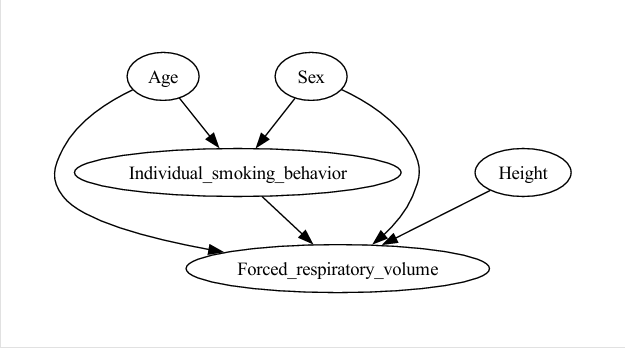


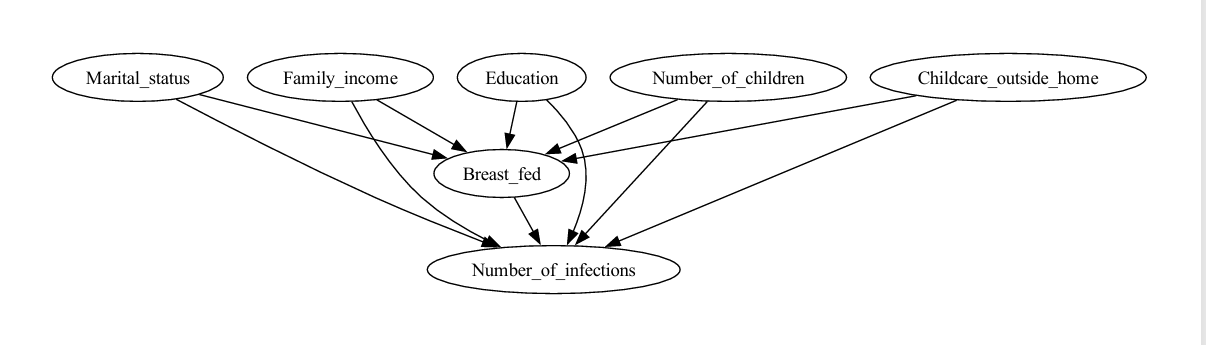